# Week 3: Losses, Regularization, Evaluation

In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 3.1 Regularization

Below we experiment with different regularization parameters on regression datasets of various sizes.

In [46]:
# Will be used in the next exercises
def gen_train_test_sets(train_size, test_size):
    # Generate data where inputs are drawn uniformly from [0, 1]
    x = np.random.rand(train_size + test_size, 1)
    # Generate eps value (Gaussian noise) from a std normal distribution, for each x separately
    # Outputs y = x + eps
    y = x + np.random.randn(train_size + test_size, 1)
    # Split into training and test data
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    train_set = pr.gendatr(x_train, y_train)
    test_set = pr.gendatr(x_test, y_test)
    return train_set, test_set

(2, 1) (2, 1) (1000, 1) (1000, 1)
2 by 1 prdataset with continuous targets.
Ridge regression, 1 to 1 trained mapping
MSE:  1.299615541027948


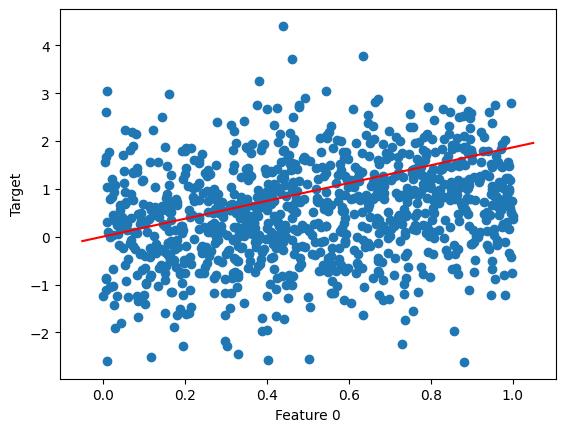

In [47]:
# Generate data where inputs are drawn uniformly from [0, 1]
train_data, test_data = gen_train_test_sets(2, 1000)
print(train_data)
pr.scatterr(test_data)

# Use ridger to fit a linear model to the data using L2 regularization
# TODO: Study the regression fit to the training data + squared loss for different amounts of regularization (in the range [10^-3, 10^3])
# TODO: Estimate the squared error using a somewhat larger test set!
R = pr.ridger(train_data, (0.001, False))   # without bias
print(R)
err = pr.testr(test_data, R, 'mse')
print('MSE: ', err)
pr.plotr(R, color='r')


(2, 1) (2, 1) (1000, 1) (1000, 1)


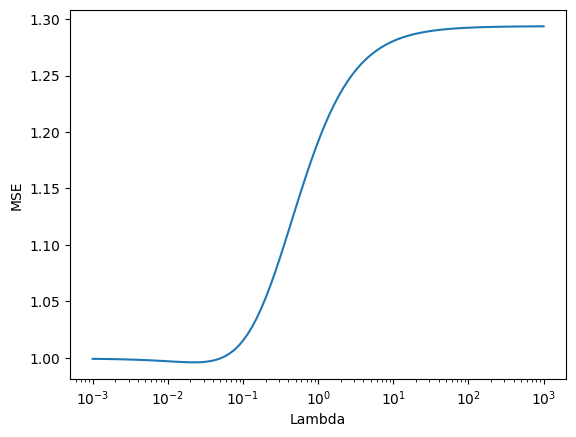

(10, 1) (10, 1) (1000, 1) (1000, 1)


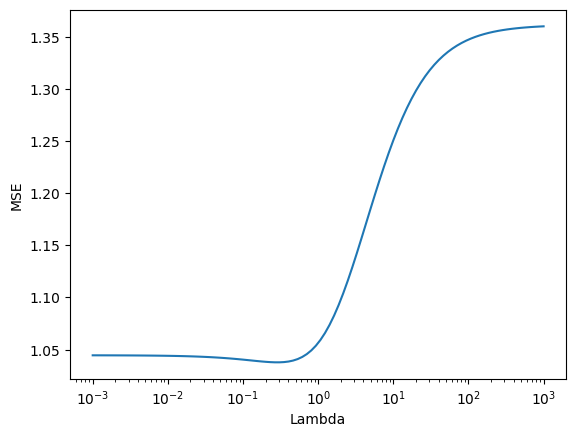

(100, 1) (100, 1) (1000, 1) (1000, 1)


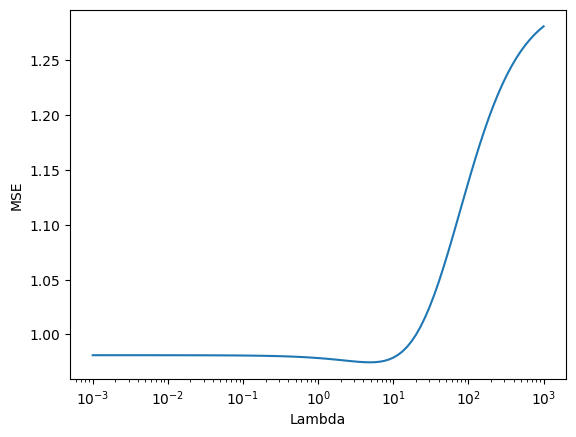

In [49]:
def plot_ridge_reg(train_size, test_size, lambdas):
    """Plots the MSE (y-axis) for different values of regularization param lambda (x-axis)"""
    train_data, test_data = gen_train_test_sets(train_size, test_size)
    mse = []
    for l in lambdas:
        R = pr.ridger(train_data, (l, False))
        mse.append(pr.testr(test_data, R, 'mse'))
    plt.plot(lambdas, mse)
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.xscale('log')
    plt.show()

# TODO: determine optimal lambda for different train set sizes: 2, 10, 100
plot_ridge_reg(2, 1000, np.logspace(-3, 3, 100))  # Take 100 values between 10^-3 and 10^3 spaced evenly on a log scale
plot_ridge_reg(10, 1000, np.logspace(-3, 3, 100))
plot_ridge_reg(100, 1000, np.logspace(-3, 3, 100))

# It seems that the larger the train set, the higher the optimal lambda
